# Trend Finding and Visualization of Parameters for DAMIC CCDs

### Goal

This program will use Alex Piers' code to find relevant variables which can be used to determine the quality of any given image.  It will be able to map these parameters which determine the images' quality to the input parameters used to configure the CCD or to combinations of the parameters.  This will help easily identify trends in the data, and make more obvious where one should search for better parameters.

### Convirt .fits files to .csv

To make analysis of these input and output variables, we don't want to be moving around all the raw data for each image since we will only be using processed data.  That means the first step will be to make a csv file for each CCD, containing the input and output variables of each image.  Later analysis will be done using the csv file.

The cell below runs FitsToCSV.py on the specified directory and all subdirectories it contains.  If the data is outside the folder, the argument should be the whole filepath to get to the directory.  Directories should be of the form "UW(4 digits)S" or "YYYY-MM-DD".  It will convirt every Img+//.fits file contained in the directory or subdirectories into a line in the csv output file.  The program may take several minutes to compile, depending on how large the directory is that one is analyzing.

In [1]:
!python FitsToCSV.py "UW1032S"

UW1032S
  0%|                                                     | 0/4 [00:00<?, ?it/s]Reading images from: UW1032S
/home/shda/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.21s/it]


### Graphing Variables (1 Dimensional)

The first analysis we want to see from the .csv file is the relation between 2 variables.  The code cell below takes two variable names as arguments, and shows the relation between them in a scatter plot.  The first argument will be the .csv file, the second argument will be the variable appearing on the x axis, and the third will appear on the y.

Key to Variables:

Inputs:
'EXP', 'AMPL', 'HCKDIRN', 'VCKDIRN', 'ITGTIME', 'VIDGAIN', 'PRETIME', 'POSTIME', 'DGWIDTH', 'RGWIDTH', 'OGWIDTH', 'SWWIDTH', 'HWIDTH', 'HOWIDTH', 'VWIDTH', 'VOWIDTH', 'ONEVCKHI', 'ONEVCKLO', 'TWOVCKHI', 'TWOVCKLO', 'TGHI', 'TGLO', 'HUHI', 'HULO', 'HLHI', 'HLLO', 'RGHI', 'RGLO', 'SWLO', 'DGHI', 'DGLO', 'OGHI', 'OGLO', 'BATTR', 'VDD1', 'VDD2', 'DRAIN1', 'DRAIN2', 'VREF1', 'VREF2', 'OPG1', 'OPG2'.

Outputs:
'imgNoise', 'skNoise', 'aveImgS', 'dSdskip', 'pixVar', 'clustVar', 'tailRatio', 'DC'.

Image info:
'NDCMS', 'NAXIS1', 'NAXIS2'.

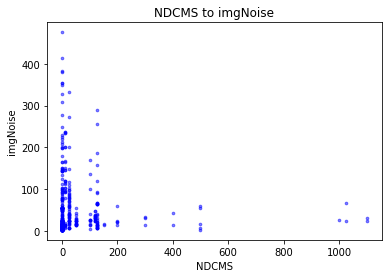

In [5]:
%matplotlib inline
import Graphing

Graphing.graph1D("UW1602S.csv","NDCMS", 0, 4000, "imgNoise", 0 , 500)

### Finding Correlations Between Variables

To get a better idea about how variables affect each other, we need a way to look at correlations between variables, which turns out to be relativley straight forward using pandas.

In [2]:
import pandas as pd

ccd = pd.read_csv("UW1602SN.csv")
ccd.corr()['DC'].sort_values()

aveImgS     -0.051115
ITGTIME     -0.046295
NAXIS2      -0.036948
VREF2       -0.033488
VREF1       -0.033488
DRAIN2      -0.033383
DRAIN1      -0.033383
VDD2        -0.033383
VDD1        -0.033383
TGHI        -0.030177
HLHI        -0.029407
HUHI        -0.029407
ONEVCKHI    -0.027669
VCKDIRN     -0.027249
DGHI        -0.020123
tailRatio   -0.018569
TGLO        -0.018479
ONEVCKLO    -0.018479
OGLO        -0.018048
DGWIDTH     -0.017571
SWLO        -0.016467
RGWIDTH     -0.016151
DGLO        -0.016107
SWWIDTH     -0.016102
OGWIDTH     -0.016059
OGHI        -0.014819
pixVar      -0.012105
imgNoise    -0.008937
EXP         -0.006524
skNoise     -0.003518
clustVar    -0.001916
TWOVCKLO     0.001976
TWOVCKHI     0.002021
HLLO         0.002407
HULO         0.002407
POSTIME      0.006735
RGLO         0.013250
VIDGAIN      0.015872
RGHI         0.025013
PRETIME      0.031693
BATTR        0.033383
NDCMS        0.587830
NAXIS1       0.796108
DC           1.000000
HWIDTH            NaN
HOWIDTH   